In [1]:
#source https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
import numpy
import pandas
import matplotlib.pyplot as plt
import math
import keras
import tensorflow as tf
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
numpy.random.seed(7)
dataframe = pandas.read_csv('airline-passengers.txt', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [4]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [8]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 2s - loss: 0.0484 - 2s/epoch - 23ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0211 - 200ms/epoch - 2ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0138 - 191ms/epoch - 2ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0118 - 175ms/epoch - 2ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0104 - 157ms/epoch - 2ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0093 - 158ms/epoch - 2ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0082 - 158ms/epoch - 2ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0071 - 156ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0063 - 158ms/epoch - 2ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0056 - 159ms/epoch - 2ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0050 - 158ms/epoch - 2ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0046 - 160ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0043 - 160ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0041 - 160ms/epoch - 2ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0039 - 160ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0038 - 157ms/epoc

In [9]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.58 RMSE
Test Score: 50.28 RMSE


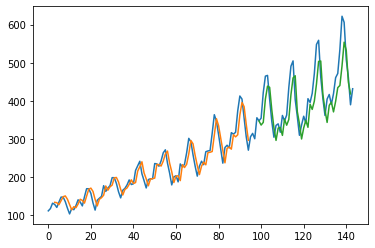

In [10]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()